**The Idea of  this CNN is that clasificate images of cloth (trousers, shirts, dress, jackets, etc).**

In [1]:
#Packages:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist #Dataset that we will use: Is a dataset of cloth (trouserts, jackets, dress, etc)
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense #Layers that we will use
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels), (test_images, test_labels)=fashion_mnist.load_data() #Load the data

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape #We have 60000 images with resolution 28x28 and one only channel every image

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
test_labels.shape #One label for every image

(10000,)

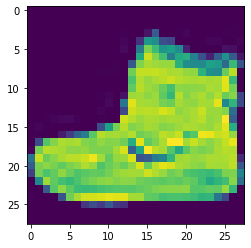

In [6]:
plt.imshow(train_images[0]) #plot a images

In [7]:
train_images[0] #Every pixel is a value between 0 and 255 (deep)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

#PREPROCCESS:

In [8]:
#Normalize the pixels with MinMaxScaler:
train_images=train_images.astype("float32")/255
test_images=test_images.astype("float32")/255

In [9]:
#Reshape for indicate that I am working with one only channel (Gray Scale):
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

In [10]:
train_labels, np.unique(train_labels) #In the dataset there are 10 classes

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [11]:
#We do OneHotEncoder to the labels (For example 1 in the position (20,8) mean that the image 20 is label as class 8):
train_labels=tf.keras.utils.to_categorical(train_labels,10)
test_labels=tf.keras.utils.to_categorical(test_labels,10)

In [12]:
train_labels.shape

(60000, 10)

#creating the model:

In [13]:
#Define the architecture of my model:
model=tf.keras.Sequential() #Using the Sequential API
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu",input_shape=(28,28,1))) #The input layer is a Convolutional 2D. After we will understand what does every layer as well as your parameters.
model.add(MaxPooling2D(pool_size=2)) #add other hidden layer
model.add(Dropout(0.3)) #add a dropout layer for reducing the over fitting and with a 30%
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())#add a flatten layer for flatten the tensors, that all staye in serie
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax")) #Output Layer: We will have 10 outputs for every instance for this 10 neurons and softmax activation function because is a task of multiple clasification

**- How we can see, no to all layers should indicate the number of neurons and the activation function**

**- Remenber that in the input layer we should always indicate the input shape of every instance**

**- Remember that the relu activation function is very good for the hidden layers; because preserve very good the original value of the output**

**- Remember that in the output layer we should always choose a activation function according our task**

**Remember that in the output layer the number of neuron should be always iqual to the number of outputs of my task**


In [14]:
#Draw the architecture of my model:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

#Compiling the Model:

In [15]:
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

#Training the Model:

In [16]:
history=model.fit(train_images,train_labels,batch_size=64,epochs=10,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 21s 11ms/step - loss: 0.6180 - accuracy: 0.7745 - val_loss: 0.3901 - val_accuracy: 0.8560
Epoch 2/10
750/750 [==============================] - 5s 7ms/step - loss: 0.4121 - accuracy: 0.8538 - val_loss: 0.3606 - val_accuracy: 0.8636
Epoch 3/10
750/750 [==============================] - 6s 9ms/step - loss: 0.3652 - accuracy: 0.8693 - val_loss: 0.3037 - val_accuracy: 0.8872
Epoch 4/10
750/750 [==============================] - 6s 7ms/step - loss: 0.3392 - accuracy: 0.8772 - val_loss: 0.2842 - val_accuracy: 0.8961
Epoch 5/10
750/750 [==============================] - 6s 9ms/step - loss: 0.3248 - accuracy: 0.8816 - val_loss: 0.2831 - val_accuracy: 0.8967
Epoch 6/10
750/750 [==============================] - 5s 7ms/step - loss: 0.3126 - accuracy: 0.8864 - val_loss: 0.2704 - val_accuracy: 0.9011
Epoch 7/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3072 - accuracy: 0.8894 - val_loss: 0.2788 - val_accuracy: 0.9003
Epoc

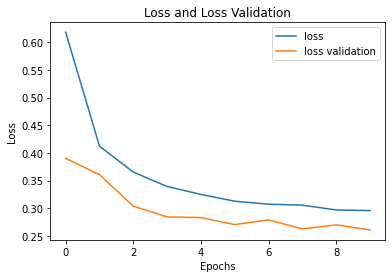

In [17]:
#Plot the loss and the loss_validation:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="loss validation")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.title("Loss and Loss Validation")
plt.legend()

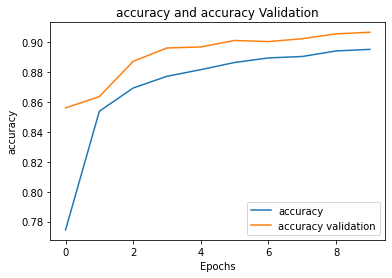

In [18]:
#Plot the accuracy and the loss_validation:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="accuracy validation")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.title("accuracy and accuracy Validation")
plt.legend()

#Evaluating the model:

In [19]:
model.evaluate(test_images,test_labels) #The accuracy is very good (>0.9)

313/313 [==============================] - 1s 4ms/step - loss: 0.2737 - accuracy: 0.9045


[0.2736685872077942, 0.9045000076293945]

#Callbacks: 

**The callbacks are a tool for drive the training of a NN, there are two types of callbakcs: Early Stopping and Checkpoins**

#Early Stopping:

In [24]:
#Compiling my model:
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [25]:
early=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=1) #Define the early stopping: accuracy is that I want to drive and patience is the number of epochs that I want to hope
#Is say, if past 1 epochs (This a very small patience), the accuracy doesn´t improve, we stop the training

In [26]:
#Training the model with the early stopping:
history=model.fit(train_images,train_labels,batch_size=64,epochs=10,validation_split=0.2,callbacks=[early])

Epoch 1/10
750/750 [==============================] - 6s 6ms/step - loss: 0.2799 - accuracy: 0.9020 - val_loss: 0.2371 - val_accuracy: 0.9131
Epoch 2/10
750/750 [==============================] - 6s 9ms/step - loss: 0.2743 - accuracy: 0.9040 - val_loss: 0.2496 - val_accuracy: 0.9125
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 0.2692 - accuracy: 0.9047 - val_loss: 0.2522 - val_accuracy: 0.9099
Epoch 4/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2730 - accuracy: 0.9050 - val_loss: 0.2626 - val_accuracy: 0.9074
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2710 - accuracy: 0.9068 - val_loss: 0.2570 - val_accuracy: 0.9123
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2691 - accuracy: 0.9065 - val_loss: 0.2635 - val_accuracy: 0.9093


**Efectly, as past 1 epoch the accuracy didn´t improve, the training stopped**

#Checkpoints:

In [30]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath="my_first_CNN.hdf5",verbose=1, monitor="accuracy",save_best_only=True)#This is for storage in the file with extension "hdf5" the model in the which the accuracy was the best (we know that for every epoch of training we have a model), the training will be full

In [27]:
#Compiling my model:
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [31]:
#Training the model with the early stopping:
history=model.fit(train_images,train_labels,batch_size=64,epochs=10,validation_split=0.2,callbacks=[checkpoint])

Epoch 1/10
746/750 [============================>.] - ETA: 0s - loss: 0.2730 - accuracy: 0.9036
Epoch 1: accuracy improved from -inf to 0.90367, saving model to my_first_CNN.hdf5
750/750 [==============================] - 6s 6ms/step - loss: 0.2731 - accuracy: 0.9037 - val_loss: 0.2681 - val_accuracy: 0.9139
Epoch 2/10
745/750 [============================>.] - ETA: 0s - loss: 0.2699 - accuracy: 0.9053
Epoch 2: accuracy improved from 0.90367 to 0.90535, saving model to my_first_CNN.hdf5
750/750 [==============================] - 4s 5ms/step - loss: 0.2699 - accuracy: 0.9054 - val_loss: 0.2880 - val_accuracy: 0.9098
Epoch 3/10
746/750 [============================>.] - ETA: 0s - loss: 0.2663 - accuracy: 0.9082
Epoch 3: accuracy improved from 0.90535 to 0.90802, saving model to my_first_CNN.hdf5
750/750 [==============================] - 4s 6ms/step - loss: 0.2669 - accuracy: 0.9080 - val_loss: 0.3076 - val_accuracy: 0.9100
Epoch 4/10
745/750 [============================>.] - ETA: 0s - 

**In the file "my_first_CNN.hdf5" we have the best possible model**

In [33]:
#Loading the best model:
model2=model
model2.load_weights("/content/my_first_CNN.hdf5")

In [36]:
model2.evaluate(test_images,test_labels) #How we can see, the model improved with the checkpoint

313/313 [==============================] - 1s 3ms/step - loss: 0.3318 - accuracy: 0.9088


[0.33181875944137573, 0.9088000059127808]

**Note:** 

**- In this case I drive the training with the variable "accuracy"(metric), but I too can do we other variables, for example, the loss**

**- Too I could combinate the early stopping with the checkpoint in the same training and do the evaluate and see what is the best**

